# Linear Regression

### Loading data

In [1]:
import numpy as np

filename = 'data_singlevar.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

# Splitting Data: Method_1

In [2]:
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [3]:
X_train

array([[ 4.94],
       [-1.58],
       [-4.45],
       [-6.06],
       [-1.22],
       [-3.55],
       [ 0.36],
       [-3.24],
       [ 1.31],
       [ 2.17],
       [ 2.94],
       [-0.92],
       [-0.91],
       [ 1.24],
       [ 1.56],
       [-4.14],
       [ 3.75],
       [ 4.15],
       [ 0.33],
       [ 3.41],
       [ 2.27],
       [ 2.6 ],
       [ 1.06],
       [ 1.04],
       [ 2.74],
       [-0.71],
       [-2.75],
       [ 0.55],
       [-3.45],
       [ 1.09],
       [ 2.47],
       [-6.35],
       [ 1.83],
       [-0.68],
       [-3.83],
       [-2.03],
       [ 3.13],
       [ 0.92],
       [ 4.02],
       [ 3.89]])

In [4]:
y_train

array([4.37, 1.7 , 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25,
       2.27, 2.  , 4.75, 3.52, 1.39, 4.9 , 4.44, 2.72, 4.59, 5.3 , 3.43,
       2.53, 3.69, 3.1 , 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.  , 3.84,
       2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94])

# Splitting Data: Method_2 using sklearn

In [5]:
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data_singlevar.txt', header= None)

In [6]:
dataset.head()

,0,1
0,4.94,4.37
1,-1.58,1.70
2,-4.45,1.88
3,-6.06,0.56
4,-1.22,2.23


In [7]:
X = dataset.iloc[:, :1].values  # para que nos de un vector 2D y no un array 1D
                                # (por esa razon no es X = dataset.iloc[:, 0].values)
y = dataset.iloc[:, 1].values


In [8]:
print(X.shape)
print(y.shape)

(50, 1)
(50,)


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_test.shape

(10, 1)

## Create linear regression object


When creating a machine learning model with scikitlearn (sklearn) we need always to:
1. Create a ML model object from the libraries
2. Train the model with the data using .fit method
3. Predict values/classes using .predict or transform method (depending on the model)
4. Test the model and get metrics of performance

#### 1. Create a ML model object from the libraries

In [13]:
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

#### 2. Train the model using the training sets with ".fit" method


In [14]:
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 3. Predict values from training data

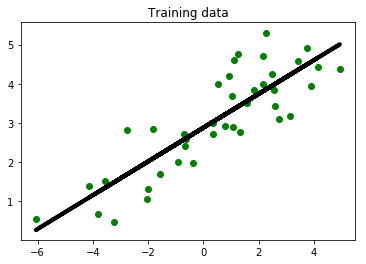

In [16]:
import matplotlib.pyplot as plt

# Predict the train data output
y_train_pred = linear_regressor.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()




#### 4. Predict values with test data and get performance results

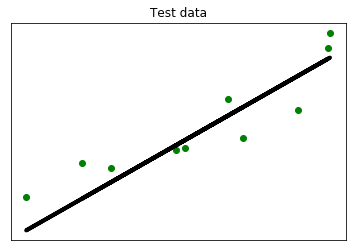

Mean absolute error = 0.55
Mean squared error = 0.39
R2 score = 0.77


In [17]:

# Predict the test data output
y_test_pred = linear_regressor.predict(X_test)


plt.figure()

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.xticks(())
plt.yticks(())
plt.show()



# Measure performance
import sklearn.metrics as sm

print('Mean absolute error =', round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print('Mean squared error =', round(sm.mean_squared_error(y_test, y_test_pred), 2))
print('R2 score =', round(sm.r2_score(y_test, y_test_pred), 2))






### Let's save the model and load it again

In [18]:
# Model persistence
import pickle as pickle

output_model_file = '3_model_linear_regr.pkl'

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print('\nNew mean absolute error =', round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))



New mean absolute error = 0.55


If we would like to know the coefficients m,b

In [19]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_ )

[0.43035297]
2.8818411633661625
